<a target="_blank" href="https://colab.research.google.com/github/23wc01/CMPSC7540">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# sources

* [How to Plot List of X, Y Coordinates in Matplotlib?](https://www.geeksforgeeks.org/how-to-plot-list-of-x-y-coordinates-in-matplotlib/)
* [Matplotlib Markers](https://www.w3schools.com/python/matplotlib_markers.asp)


# **Imports and installs**

In [2]:
import matplotlib.pylab as plt
import numpy as np

# **1. Define data**

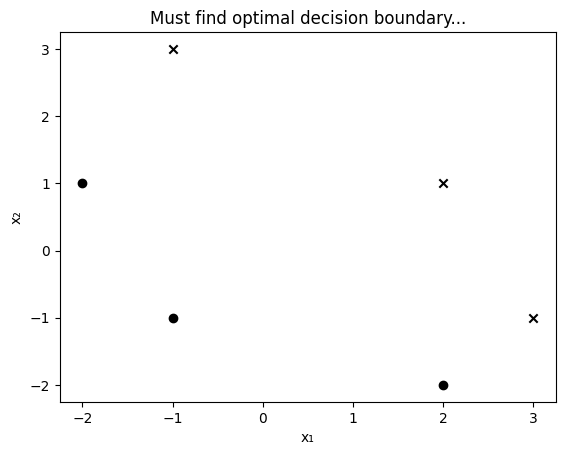

In [98]:
class_o_data = np.array([
    [-2, 1],
    [-1, -1],
    [2, -2],
])
class_x_data = np.array([
    [-1, 3],
    [3, -1],
    [2, 1],
])

x_x, x_y = class_x_data.T
o_x, o_y = class_o_data.T

plt.scatter(x_x, x_y, marker="x", color="black")
plt.scatter(o_x, o_y, marker="o", color="black")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Must find optimal decision boundary...")
plt.show()

X = np.concatenate((class_o_data, class_x_data)) # Combined class data
y = np.concatenate((np.zeros(len(class_o_data)), np.ones(len(class_x_data)))) # labels [0,0,0,1,1,1]

# **2. Define needed equations**

In [91]:
def line_eq(x, slope, y_intercept):
    # Define linear equation y = mx + b (e.g., y = 2x + 1)
    return slope * x + y_intercept

def sigmoid(z):
    return 1 /( 1 + np.exp(-1 * z))

def cost_function(weight, X, y, bias):
    # log likelihood function
    h = sigmoid(np.dot(X, weight) + bias) # Predicted values
    cost = -1 / len(y) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) # -1/m ∑ (1-y)*log(h(1-x)) + y*log(h(x))
    return cost

def gradient_descent(X, y, weight, bias, learning_rate, iterations=100):
    m = len(y)
    past_costs = []
    for i in range(iterations):
        h = sigmoid(np.dot(X, weight) + bias)
        dz = h - y # y hat - y
        weight_gradient = -1/m * np.dot(X.T, dz)
        bias_gradient = -1/m * np.sum(dz)
        weight -= learning_rate * weight_gradient
        bias -= learning_rate * bias_gradient
        cost = cost_function(weight, X, y, bias)
        past_costs.append(cost)
    return weight, bias, past_costs


# **3. Input initial values & guesses**

In [92]:
initial_weight = np.zeros(X.shape[1])
initial_bias = 0
learning_rate = 0.01
iterations = 150
weight, bias, past_costs = gradient_descent(X, y, initial_weight, initial_bias, learning_rate, iterations=iterations)

# **4. Plot results**

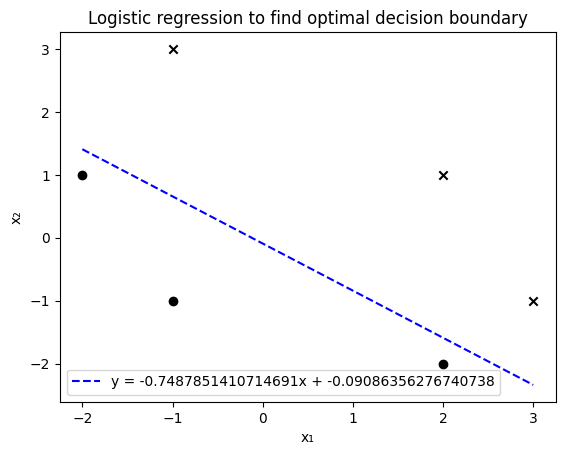

In [96]:
slope = weight[1]
y_intercept = bias
x_values = np.linspace(-2, 3, 8)  # Generate x values: 10 points from -3 to 5
y_values = line_eq(x_values, slope, y_intercept)  # Calculate y values based on the function

# Plotting the line
plt.plot(x_values, y_values, "--", color= "blue", label=f"y = {slope}x + {y_intercept}")
plt.scatter(x_x, x_y, marker="x", color="black")
plt.scatter(o_x, o_y, marker="o", color="black")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Logistic regression to find optimal decision boundary")
plt.legend()


# Show the plot
plt.show()